In [ ]:
# Description: This file contains daily global mean near-surface (2m) air temperature
#  data from ERA5 from 1940 to 2024 as well as daily temperature anomalies relative to
#  the 1991-2020 reference period.
# Data source: The original ERA5 gridded hourly data used to generate the time series can be
#  downloaded from the C3S Climate Data Store (CDS) at the following link:
#  https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-single-levels
# Data availability: The ERA5 data available in the CDS are updated with a 5-day delay (120 hours)
#  behind real-time. Note that the time series below includes values based on ERA5 data not yet
#  available in the CDS (for days 2 to 5 behind real-time).
# Status: Can be preliminary or final. If preliminary, the values will likely change (slightly)
#  once the final ERA5 data for the day are available (typically 3 days behind real-time).
# Columns:
#  2t: Daily mean absolute temperature based on hourly values from 00 to 23 UTC
#  clim_91-20: Daily climatology for 1991-2020
#  ano_91-20: Daily anomaly relative to the 1991-2020 daily climatology
#  status: Preliminary or final
# Units: deg. C
# Last updated: 17 Jul 2024

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
# URL of the CSV file
url = "https://sites.ecmwf.int/data/climatepulse/data/series/era5_daily_series_2t_global.csv"

# Read the data into a pandas DataFrame
data = pd.read_csv(url, skiprows = 18)

data = data.rename(columns = {'2t':'daily_mean_temp','clim_91-20':'daily_climatology_91-20','ano_91-20':'anom_91-20'}).drop(['status'],axis=1)

# Display the first few rows of the dataframe
print(data.head())

         date  daily_mean_temp  daily_climatology_91-20  anom_91-20
0  1940-01-01            11.72                    12.48       -0.76
1  1940-01-02            11.66                    12.47       -0.81
2  1940-01-03            11.66                    12.47       -0.80
3  1940-01-04            11.68                    12.46       -0.78
4  1940-01-05            11.60                    12.45       -0.85


In [7]:
data.shape

(30878, 5)

In [14]:
# Calculate monthly and yearly averages
data['month'] = data['date'].dt.to_period('M')
data['year'] = data['date'].dt.to_period('Y')

monthly_avg = data.groupby('month')['daily_mean_temp'].mean().reset_index()
yearly_avg = data.groupby('year')['daily_mean_temp'].mean().reset_index()

# Convert period to datetime for plotting
monthly_avg['month'] = monthly_avg['month'].dt.to_timestamp()
yearly_avg['year'] = yearly_avg['year'].dt.to_timestamp()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

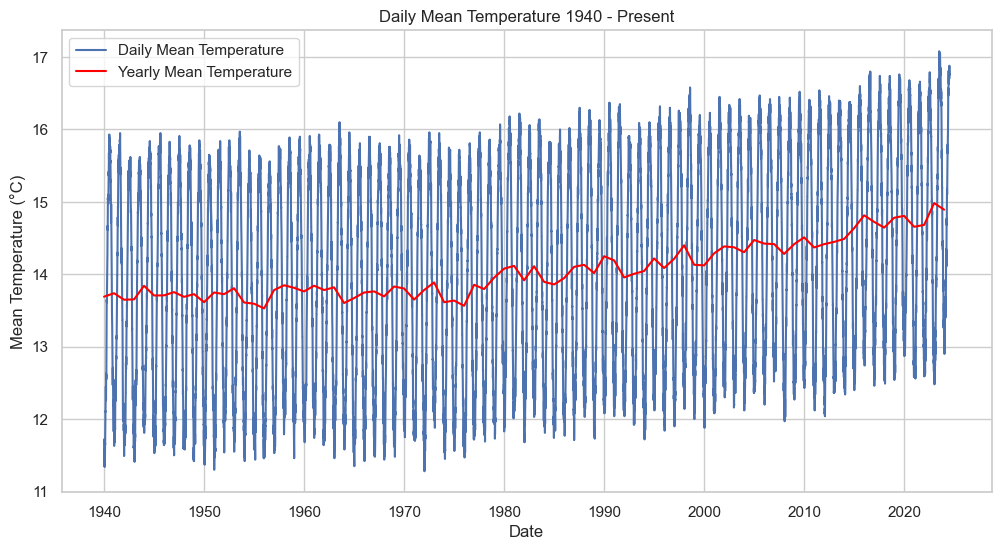

In [17]:
# Ensure the 'date' column is in datetime format
data['date'] = pd.to_datetime(data['date'])

# Set the style of the plot
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='daily_mean_temp', data=data, label = 'Daily Mean Temperature')

# Plot monthly averages
#sns.lineplot(x='month', y='daily_mean_temp', data=monthly_avg, label='Monthly Mean Temperature', color='orange')

# Plot yearly averages
sns.lineplot(x='year', y='daily_mean_temp', data=yearly_avg, label='Yearly Mean Temperature', color='red')


# Set the title and labels
plt.title('Daily Mean Temperature 1940 - Present')
plt.xlabel('Date')
plt.ylabel('Mean Temperature (°C)')

# Display the plot
plt.show()